# Lab: Neural networks

## Exercise 4

> In this final exercise you will have to create a neural network to classify hand written numbers. Such a neural network is for example used in the post sorting process.

> The dataset consists of images of hand written numbers ranging from 0 till 9.

> Your goal is to train a neural network on the training set (*X_train*) and predict on the test_set (*X_test*)

> Try to get an accuracy as high as possible. Decide yourself what to modify. You can modify for example: the learning_rate, amount of layers, neurons per layer, preprocessing methods, gradient descent to stochastic gradient descent/ batch gradient descent...

> Feel free to change other aspects too if you want (e.g. activation function, but then you have to change to backprop algorithm).

#### A few hints:

> Calculate the accuracy on both the training set (X_train) and testing set (X_test) to see if there is a large difference

> You can also do this every 5,10,... epochs (monitor the accuracy)

> Calculate the loss on the training set, but also the test set (monitor the loss)

> Plot these


Name: Benjamin Fraeyman

#### Imports

In [1]:
import numpy as np
import matplotlib.pylab as plt
from NN_Helper import Gradient_Checker
gradient_checker = Gradient_Checker(limit=1.0*np.exp(-8))
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.datasets import load_digits
import random

#### Create toy dataset


X.shape: (1797L, 64L)
y.shape: (1797L, 10L)
X_train.shape: (1700L, 64L)
X_test.shape: (97L, 64L)
y_train.shape: (1700L, 10L)
y_test.shape: (97L, 10L)


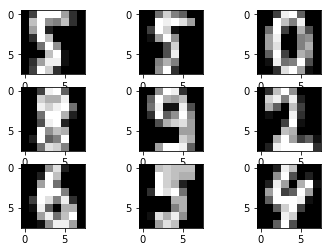

In [2]:
# Set containing samples with features
data = load_digits(10)
X = data['data']
print "X.shape:", X.shape
y = data['target']

encoder = OneHotEncoder()
y = encoder.fit_transform(np.reshape(y,(len(y),1))).toarray()
print "y.shape:", y.shape

X, y = shuffle(X, y, random_state=0)

X_train = X[:1700]
print "X_train.shape:", X_train.shape
X_test = X[1700:]
print "X_test.shape:", X_test.shape
y_train = y[:1700]
print "y_train.shape:", y_train.shape
y_test = y[1700:]
print "y_test.shape:", y_test.shape

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(np.reshape(X[i*100],(8,8)),cmap=plt.cm.gray,interpolation='None')
plt.show()

**Re-use the code of exercise 3 (backwards, forwards, loss,...)** (you may use more cells if you want)

-- reused code here --

#### Initialize weight matrix

In [42]:
n_samples = float(len(X_train))
print "n_samples:", n_samples
n_neurons = 10
print "n_neurons:", n_neurons
np.random.seed(1)

# initialize weights randomly with mean 0
w1 = 2*np.random.random((X_train.shape[1],n_neurons)) - 1
print "w1.shape:", w1.shape
w2 = 2*np.random.random((n_neurons,y_train.shape[1])) - 1
print "w2.shape:", w2.shape

# initialize the bias for every layer
b1 = np.zeros((1,w1.shape[1]))
print "b1.shape:", b1.shape
b2 = np.zeros((1,w2.shape[1]))
print "b2.shape:", b2.shape

n_samples: 1700.0
n_neurons: 10
w1.shape: (64L, 10L)
w2.shape: (10L, 10L)
b1.shape: (1L, 10L)
b2.shape: (1L, 10L)


#### Activiation function and the derivative of this function 

In [4]:
# Sigmoid function
def sigmoid(x):
        output = 1/(1+np.exp(-x))
        return output
    
# Derivative of the sigmoid function
def sigmoid_output_to_derivative(output):
        return output*(1-output)

#### Forward propagation

In [5]:
#re-use the forward propagation function you wrote in the previous exercise
#update it to use a bias
def forward(input_layer=None,weights=None,bias=None):
    p = np.dot(input_layer,weights) +bias
    a = sigmoid(p)
    return a

# https://stackoverflow.com/questions/2480650/role-of-bias-in-neural-networks

#### Backpropagation

In [6]:
#https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
def backwards(input_layer=None,weights=None, a=None, dlda=None):
    dadp = sigmoid_output_to_derivative(a)
    
    dpdw = input_layer.T
    dldw = np.dot(dpdw,dlda*dadp)
    
    # (a+w) afgeleid naar w => 1
    dldp = dlda*dadp
    ones = np.ones((1, int(n_samples)))
    dldb = np.dot(ones,dldp)
    
    dpdx = weights.T
    dldx = np.dot(dlda*dadp, dpdx)
    
    dldw /= n_samples
    dldb /= n_samples
    return dldw,dldb,dldx

#### Loss function

In [7]:
def squared_loss(predicted=None,target=None):
    loss = 0.5*np.sum((predicted-target)**2)
    loss /= n_samples
    return loss

**Derivative of the loss function**

In [8]:
def squared_loss_derrivative(predicted=None,target=None):
        dlda = predicted-target
        return dlda

-- end of reused code --

#### Main function


In [43]:
#<Fill-in>-----------
# A list to store the loss per epoch in. We can plot this later on to see if the network learns something
loss_list=[]
# How many times we will do the combination of forward and backward propagation
n_epoch = 10000
#learning rate
learning_rate = 0.01
# --------------------

for iter in xrange(n_epoch):
    print "iter:", iter
    a1 = forward(input_layer=X_train,weights=w1,bias=b1)
    a2 = forward(input_layer=a1,weights=w2,bias=b2)
    loss = squared_loss(predicted=a2,target=y_train)
    loss_list.append(loss)
    dldw2, dldb2, dldx2 = backwards(input_layer= a1,weights=w2, a=a2, dlda = squared_loss_derrivative(predicted=a2,target=y_train))
    dldw, dldb, dldx = backwards(input_layer= X_train,weights=w1, a=a1, dlda = dldx2/n_samples)
    if iter != 0.:
        if iter % 10000 == 0.:
            f = lambda x: squared_loss(target=y_train,predicted=forward(input_layer=forward(input_layer=X_train,weights=w1,bias=b1),weights=w2,bias=b2))
            gradient_checker.gradient_check(X_train,y_train,dldx,f)
    if iter == 9999:
        f = lambda x: squared_loss(target=y_train,predicted=forward(input_layer=forward(input_layer=X_train,weights=w1,bias=b1),weights=w2,bias=b2))
        gradient_checker.gradient_check(X_train,y_train,dldx,f)
    w1 += -learning_rate*dldw
    w2 += -learning_rate*dldw2
    b1 += -learning_rate*dldb
    b2 += -learning_rate*dldb2
    
# #Calculate the accuracy for X_train using the "accuracy_score" function from scikit-learn which is already imported 
# # (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
# <Fill-in>
# #Calculate the accuracy for X_test using "the accuracy_score"
# <Fill-in>


iter: 0
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
iter: 9
iter: 10
iter: 11
iter: 12
iter: 13
iter: 14
iter: 15
iter: 16
iter: 17
iter: 18
iter: 19
iter: 20
iter: 21
iter: 22
iter: 23
iter: 24
iter: 25
iter: 26
iter: 27
iter: 28
iter: 29
iter: 30
iter: 31
iter: 32
iter: 33
iter: 34
iter: 35
iter: 36
iter: 37
iter: 38
iter: 39
iter: 40
iter: 41
iter: 42
iter: 43
iter: 44
iter: 45
iter: 46
iter: 47
iter: 48
iter: 49
iter: 50
iter: 51
iter: 52
iter: 53
iter: 54
iter: 55
iter: 56
iter: 57
iter: 58
iter: 59
iter: 60
iter: 61
iter: 62
iter: 63
iter: 64
iter: 65
iter: 66
iter: 67
iter: 68
iter: 69
iter: 70
iter: 71
iter: 72
iter: 73
iter: 74
iter: 75
iter: 76
iter: 77
iter: 78
iter: 79
iter: 80
iter: 81
iter: 82
iter: 83
iter: 84
iter: 85
iter: 86
iter: 87
iter: 88
iter: 89
iter: 90
iter: 91
iter: 92
iter: 93
iter: 94
iter: 95
iter: 96
iter: 97
iter: 98
iter: 99
iter: 100
iter: 101
iter: 102
iter: 103
iter: 104
iter: 105
iter: 106
iter: 107
iter: 108
iter: 109
iter: 110


iter: 917
iter: 918
iter: 919
iter: 920
iter: 921
iter: 922
iter: 923
iter: 924
iter: 925
iter: 926
iter: 927
iter: 928
iter: 929
iter: 930
iter: 931
iter: 932
iter: 933
iter: 934
iter: 935
iter: 936
iter: 937
iter: 938
iter: 939
iter: 940
iter: 941
iter: 942
iter: 943
iter: 944
iter: 945
iter: 946
iter: 947
iter: 948
iter: 949
iter: 950
iter: 951
iter: 952
iter: 953
iter: 954
iter: 955
iter: 956
iter: 957
iter: 958
iter: 959
iter: 960
iter: 961
iter: 962
iter: 963
iter: 964
iter: 965
iter: 966
iter: 967
iter: 968
iter: 969
iter: 970
iter: 971
iter: 972
iter: 973
iter: 974
iter: 975
iter: 976
iter: 977
iter: 978
iter: 979
iter: 980
iter: 981
iter: 982
iter: 983
iter: 984
iter: 985
iter: 986
iter: 987
iter: 988
iter: 989
iter: 990
iter: 991
iter: 992
iter: 993
iter: 994
iter: 995
iter: 996
iter: 997
iter: 998
iter: 999
iter: 1000
iter: 1001
iter: 1002
iter: 1003
iter: 1004
iter: 1005
iter: 1006
iter: 1007
iter: 1008
iter: 1009
iter: 1010
iter: 1011
iter: 1012
iter: 1013
iter: 1014
iter:

iter: 1729
iter: 1730
iter: 1731
iter: 1732
iter: 1733
iter: 1734
iter: 1735
iter: 1736
iter: 1737
iter: 1738
iter: 1739
iter: 1740
iter: 1741
iter: 1742
iter: 1743
iter: 1744
iter: 1745
iter: 1746
iter: 1747
iter: 1748
iter: 1749
iter: 1750
iter: 1751
iter: 1752
iter: 1753
iter: 1754
iter: 1755
iter: 1756
iter: 1757
iter: 1758
iter: 1759
iter: 1760
iter: 1761
iter: 1762
iter: 1763
iter: 1764
iter: 1765
iter: 1766
iter: 1767
iter: 1768
iter: 1769
iter: 1770
iter: 1771
iter: 1772
iter: 1773
iter: 1774
iter: 1775
iter: 1776
iter: 1777
iter: 1778
iter: 1779
iter: 1780
iter: 1781
iter: 1782
iter: 1783
iter: 1784
iter: 1785
iter: 1786
iter: 1787
iter: 1788
iter: 1789
iter: 1790
iter: 1791
iter: 1792
iter: 1793
iter: 1794
iter: 1795
iter: 1796
iter: 1797
iter: 1798
iter: 1799
iter: 1800
iter: 1801
iter: 1802
iter: 1803
iter: 1804
iter: 1805
iter: 1806
iter: 1807
iter: 1808
iter: 1809
iter: 1810
iter: 1811
iter: 1812
iter: 1813
iter: 1814
iter: 1815
iter: 1816
iter: 1817
iter: 1818
iter: 1819

iter: 2507
iter: 2508
iter: 2509
iter: 2510
iter: 2511
iter: 2512
iter: 2513
iter: 2514
iter: 2515
iter: 2516
iter: 2517
iter: 2518
iter: 2519
iter: 2520
iter: 2521
iter: 2522
iter: 2523
iter: 2524
iter: 2525
iter: 2526
iter: 2527
iter: 2528
iter: 2529
iter: 2530
iter: 2531
iter: 2532
iter: 2533
iter: 2534
iter: 2535
iter: 2536
iter: 2537
iter: 2538
iter: 2539
iter: 2540
iter: 2541
iter: 2542
iter: 2543
iter: 2544
iter: 2545
iter: 2546
iter: 2547
iter: 2548
iter: 2549
iter: 2550
iter: 2551
iter: 2552
iter: 2553
iter: 2554
iter: 2555
iter: 2556
iter: 2557
iter: 2558
iter: 2559
iter: 2560
iter: 2561
iter: 2562
iter: 2563
iter: 2564
iter: 2565
iter: 2566
iter: 2567
iter: 2568
iter: 2569
iter: 2570
iter: 2571
iter: 2572
iter: 2573
iter: 2574
iter: 2575
iter: 2576
iter: 2577
iter: 2578
iter: 2579
iter: 2580
iter: 2581
iter: 2582
iter: 2583
iter: 2584
iter: 2585
iter: 2586
iter: 2587
iter: 2588
iter: 2589
iter: 2590
iter: 2591
iter: 2592
iter: 2593
iter: 2594
iter: 2595
iter: 2596
iter: 2597

iter: 3345
iter: 3346
iter: 3347
iter: 3348
iter: 3349
iter: 3350
iter: 3351
iter: 3352
iter: 3353
iter: 3354
iter: 3355
iter: 3356
iter: 3357
iter: 3358
iter: 3359
iter: 3360
iter: 3361
iter: 3362
iter: 3363
iter: 3364
iter: 3365
iter: 3366
iter: 3367
iter: 3368
iter: 3369
iter: 3370
iter: 3371
iter: 3372
iter: 3373
iter: 3374
iter: 3375
iter: 3376
iter: 3377
iter: 3378
iter: 3379
iter: 3380
iter: 3381
iter: 3382
iter: 3383
iter: 3384
iter: 3385
iter: 3386
iter: 3387
iter: 3388
iter: 3389
iter: 3390
iter: 3391
iter: 3392
iter: 3393
iter: 3394
iter: 3395
iter: 3396
iter: 3397
iter: 3398
iter: 3399
iter: 3400
iter: 3401
iter: 3402
iter: 3403
iter: 3404
iter: 3405
iter: 3406
iter: 3407
iter: 3408
iter: 3409
iter: 3410
iter: 3411
iter: 3412
iter: 3413
iter: 3414
iter: 3415
iter: 3416
iter: 3417
iter: 3418
iter: 3419
iter: 3420
iter: 3421
iter: 3422
iter: 3423
iter: 3424
iter: 3425
iter: 3426
iter: 3427
iter: 3428
iter: 3429
iter: 3430
iter: 3431
iter: 3432
iter: 3433
iter: 3434
iter: 3435

iter: 4144
iter: 4145
iter: 4146
iter: 4147
iter: 4148
iter: 4149
iter: 4150
iter: 4151
iter: 4152
iter: 4153
iter: 4154
iter: 4155
iter: 4156
iter: 4157
iter: 4158
iter: 4159
iter: 4160
iter: 4161
iter: 4162
iter: 4163
iter: 4164
iter: 4165
iter: 4166
iter: 4167
iter: 4168
iter: 4169
iter: 4170
iter: 4171
iter: 4172
iter: 4173
iter: 4174
iter: 4175
iter: 4176
iter: 4177
iter: 4178
iter: 4179
iter: 4180
iter: 4181
iter: 4182
iter: 4183
iter: 4184
iter: 4185
iter: 4186
iter: 4187
iter: 4188
iter: 4189
iter: 4190
iter: 4191
iter: 4192
iter: 4193
iter: 4194
iter: 4195
iter: 4196
iter: 4197
iter: 4198
iter: 4199
iter: 4200
iter: 4201
iter: 4202
iter: 4203
iter: 4204
iter: 4205
iter: 4206
iter: 4207
iter: 4208
iter: 4209
iter: 4210
iter: 4211
iter: 4212
iter: 4213
iter: 4214
iter: 4215
iter: 4216
iter: 4217
iter: 4218
iter: 4219
iter: 4220
iter: 4221
iter: 4222
iter: 4223
iter: 4224
iter: 4225
iter: 4226
iter: 4227
iter: 4228
iter: 4229
iter: 4230
iter: 4231
iter: 4232
iter: 4233
iter: 4234

iter: 4962
iter: 4963
iter: 4964
iter: 4965
iter: 4966
iter: 4967
iter: 4968
iter: 4969
iter: 4970
iter: 4971
iter: 4972
iter: 4973
iter: 4974
iter: 4975
iter: 4976
iter: 4977
iter: 4978
iter: 4979
iter: 4980
iter: 4981
iter: 4982
iter: 4983
iter: 4984
iter: 4985
iter: 4986
iter: 4987
iter: 4988
iter: 4989
iter: 4990
iter: 4991
iter: 4992
iter: 4993
iter: 4994
iter: 4995
iter: 4996
iter: 4997
iter: 4998
iter: 4999
iter: 5000
iter: 5001
iter: 5002
iter: 5003
iter: 5004
iter: 5005
iter: 5006
iter: 5007
iter: 5008
iter: 5009
iter: 5010
iter: 5011
iter: 5012
iter: 5013
iter: 5014
iter: 5015
iter: 5016
iter: 5017
iter: 5018
iter: 5019
iter: 5020
iter: 5021
iter: 5022
iter: 5023
iter: 5024
iter: 5025
iter: 5026
iter: 5027
iter: 5028
iter: 5029
iter: 5030
iter: 5031
iter: 5032
iter: 5033
iter: 5034
iter: 5035
iter: 5036
iter: 5037
iter: 5038
iter: 5039
iter: 5040
iter: 5041
iter: 5042
iter: 5043
iter: 5044
iter: 5045
iter: 5046
iter: 5047
iter: 5048
iter: 5049
iter: 5050
iter: 5051
iter: 5052

iter: 5802
iter: 5803
iter: 5804
iter: 5805
iter: 5806
iter: 5807
iter: 5808
iter: 5809
iter: 5810
iter: 5811
iter: 5812
iter: 5813
iter: 5814
iter: 5815
iter: 5816
iter: 5817
iter: 5818
iter: 5819
iter: 5820
iter: 5821
iter: 5822
iter: 5823
iter: 5824
iter: 5825
iter: 5826
iter: 5827
iter: 5828
iter: 5829
iter: 5830
iter: 5831
iter: 5832
iter: 5833
iter: 5834
iter: 5835
iter: 5836
iter: 5837
iter: 5838
iter: 5839
iter: 5840
iter: 5841
iter: 5842
iter: 5843
iter: 5844
iter: 5845
iter: 5846
iter: 5847
iter: 5848
iter: 5849
iter: 5850
iter: 5851
iter: 5852
iter: 5853
iter: 5854
iter: 5855
iter: 5856
iter: 5857
iter: 5858
iter: 5859
iter: 5860
iter: 5861
iter: 5862
iter: 5863
iter: 5864
iter: 5865
iter: 5866
iter: 5867
iter: 5868
iter: 5869
iter: 5870
iter: 5871
iter: 5872
iter: 5873
iter: 5874
iter: 5875
iter: 5876
iter: 5877
iter: 5878
iter: 5879
iter: 5880
iter: 5881
iter: 5882
iter: 5883
iter: 5884
iter: 5885
iter: 5886
iter: 5887
iter: 5888
iter: 5889
iter: 5890
iter: 5891
iter: 5892

iter: 6583
iter: 6584
iter: 6585
iter: 6586
iter: 6587
iter: 6588
iter: 6589
iter: 6590
iter: 6591
iter: 6592
iter: 6593
iter: 6594
iter: 6595
iter: 6596
iter: 6597
iter: 6598
iter: 6599
iter: 6600
iter: 6601
iter: 6602
iter: 6603
iter: 6604
iter: 6605
iter: 6606
iter: 6607
iter: 6608
iter: 6609
iter: 6610
iter: 6611
iter: 6612
iter: 6613
iter: 6614
iter: 6615
iter: 6616
iter: 6617
iter: 6618
iter: 6619
iter: 6620
iter: 6621
iter: 6622
iter: 6623
iter: 6624
iter: 6625
iter: 6626
iter: 6627
iter: 6628
iter: 6629
iter: 6630
iter: 6631
iter: 6632
iter: 6633
iter: 6634
iter: 6635
iter: 6636
iter: 6637
iter: 6638
iter: 6639
iter: 6640
iter: 6641
iter: 6642
iter: 6643
iter: 6644
iter: 6645
iter: 6646
iter: 6647
iter: 6648
iter: 6649
iter: 6650
iter: 6651
iter: 6652
iter: 6653
iter: 6654
iter: 6655
iter: 6656
iter: 6657
iter: 6658
iter: 6659
iter: 6660
iter: 6661
iter: 6662
iter: 6663
iter: 6664
iter: 6665
iter: 6666
iter: 6667
iter: 6668
iter: 6669
iter: 6670
iter: 6671
iter: 6672
iter: 6673

iter: 7336
iter: 7337
iter: 7338
iter: 7339
iter: 7340
iter: 7341
iter: 7342
iter: 7343
iter: 7344
iter: 7345
iter: 7346
iter: 7347
iter: 7348
iter: 7349
iter: 7350
iter: 7351
iter: 7352
iter: 7353
iter: 7354
iter: 7355
iter: 7356
iter: 7357
iter: 7358
iter: 7359
iter: 7360
iter: 7361
iter: 7362
iter: 7363
iter: 7364
iter: 7365
iter: 7366
iter: 7367
iter: 7368
iter: 7369
iter: 7370
iter: 7371
iter: 7372
iter: 7373
iter: 7374
iter: 7375
iter: 7376
iter: 7377
iter: 7378
iter: 7379
iter: 7380
iter: 7381
iter: 7382
iter: 7383
iter: 7384
iter: 7385
iter: 7386
iter: 7387
iter: 7388
iter: 7389
iter: 7390
iter: 7391
iter: 7392
iter: 7393
iter: 7394
iter: 7395
iter: 7396
iter: 7397
iter: 7398
iter: 7399
iter: 7400
iter: 7401
iter: 7402
iter: 7403
iter: 7404
iter: 7405
iter: 7406
iter: 7407
iter: 7408
iter: 7409
iter: 7410
iter: 7411
iter: 7412
iter: 7413
iter: 7414
iter: 7415
iter: 7416
iter: 7417
iter: 7418
iter: 7419
iter: 7420
iter: 7421
iter: 7422
iter: 7423
iter: 7424
iter: 7425
iter: 7426

iter: 8120
iter: 8121
iter: 8122
iter: 8123
iter: 8124
iter: 8125
iter: 8126
iter: 8127
iter: 8128
iter: 8129
iter: 8130
iter: 8131
iter: 8132
iter: 8133
iter: 8134
iter: 8135
iter: 8136
iter: 8137
iter: 8138
iter: 8139
iter: 8140
iter: 8141
iter: 8142
iter: 8143
iter: 8144
iter: 8145
iter: 8146
iter: 8147
iter: 8148
iter: 8149
iter: 8150
iter: 8151
iter: 8152
iter: 8153
iter: 8154
iter: 8155
iter: 8156
iter: 8157
iter: 8158
iter: 8159
iter: 8160
iter: 8161
iter: 8162
iter: 8163
iter: 8164
iter: 8165
iter: 8166
iter: 8167
iter: 8168
iter: 8169
iter: 8170
iter: 8171
iter: 8172
iter: 8173
iter: 8174
iter: 8175
iter: 8176
iter: 8177
iter: 8178
iter: 8179
iter: 8180
iter: 8181
iter: 8182
iter: 8183
iter: 8184
iter: 8185
iter: 8186
iter: 8187
iter: 8188
iter: 8189
iter: 8190
iter: 8191
iter: 8192
iter: 8193
iter: 8194
iter: 8195
iter: 8196
iter: 8197
iter: 8198
iter: 8199
iter: 8200
iter: 8201
iter: 8202
iter: 8203
iter: 8204
iter: 8205
iter: 8206
iter: 8207
iter: 8208
iter: 8209
iter: 8210

iter: 8907
iter: 8908
iter: 8909
iter: 8910
iter: 8911
iter: 8912
iter: 8913
iter: 8914
iter: 8915
iter: 8916
iter: 8917
iter: 8918
iter: 8919
iter: 8920
iter: 8921
iter: 8922
iter: 8923
iter: 8924
iter: 8925
iter: 8926
iter: 8927
iter: 8928
iter: 8929
iter: 8930
iter: 8931
iter: 8932
iter: 8933
iter: 8934
iter: 8935
iter: 8936
iter: 8937
iter: 8938
iter: 8939
iter: 8940
iter: 8941
iter: 8942
iter: 8943
iter: 8944
iter: 8945
iter: 8946
iter: 8947
iter: 8948
iter: 8949
iter: 8950
iter: 8951
iter: 8952
iter: 8953
iter: 8954
iter: 8955
iter: 8956
iter: 8957
iter: 8958
iter: 8959
iter: 8960
iter: 8961
iter: 8962
iter: 8963
iter: 8964
iter: 8965
iter: 8966
iter: 8967
iter: 8968
iter: 8969
iter: 8970
iter: 8971
iter: 8972
iter: 8973
iter: 8974
iter: 8975
iter: 8976
iter: 8977
iter: 8978
iter: 8979
iter: 8980
iter: 8981
iter: 8982
iter: 8983
iter: 8984
iter: 8985
iter: 8986
iter: 8987
iter: 8988
iter: 8989
iter: 8990
iter: 8991
iter: 8992
iter: 8993
iter: 8994
iter: 8995
iter: 8996
iter: 8997

iter: 9670
iter: 9671
iter: 9672
iter: 9673
iter: 9674
iter: 9675
iter: 9676
iter: 9677
iter: 9678
iter: 9679
iter: 9680
iter: 9681
iter: 9682
iter: 9683
iter: 9684
iter: 9685
iter: 9686
iter: 9687
iter: 9688
iter: 9689
iter: 9690
iter: 9691
iter: 9692
iter: 9693
iter: 9694
iter: 9695
iter: 9696
iter: 9697
iter: 9698
iter: 9699
iter: 9700
iter: 9701
iter: 9702
iter: 9703
iter: 9704
iter: 9705
iter: 9706
iter: 9707
iter: 9708
iter: 9709
iter: 9710
iter: 9711
iter: 9712
iter: 9713
iter: 9714
iter: 9715
iter: 9716
iter: 9717
iter: 9718
iter: 9719
iter: 9720
iter: 9721
iter: 9722
iter: 9723
iter: 9724
iter: 9725
iter: 9726
iter: 9727
iter: 9728
iter: 9729
iter: 9730
iter: 9731
iter: 9732
iter: 9733
iter: 9734
iter: 9735
iter: 9736
iter: 9737
iter: 9738
iter: 9739
iter: 9740
iter: 9741
iter: 9742
iter: 9743
iter: 9744
iter: 9745
iter: 9746
iter: 9747
iter: 9748
iter: 9749
iter: 9750
iter: 9751
iter: 9752
iter: 9753
iter: 9754
iter: 9755
iter: 9756
iter: 9757
iter: 9758
iter: 9759
iter: 9760

In [44]:
print "Output After Training:"
print
print "The output of the network"
print
print a2
print
print "The ground truth:"
print
print y_train
print
print
print "Apply argmax on the output to get the index per row where the value is maximum"
print
print "Prediction network"
print
print np.argmax(a2,axis=1)
print
print "Ground truth"
print
print np.argmax(y_train,axis=1)

Output After Training:

The output of the network

[[0.23611656 0.06021219 0.11795784 ... 0.04778981 0.06820066 0.05662409]
 [0.07033304 0.2889369  0.24978131 ... 0.03362243 0.21815421 0.01190157]
 [0.08633226 0.06112195 0.26029332 ... 0.05178171 0.09533905 0.0199318 ]
 ...
 [0.04741874 0.06718256 0.12356908 ... 0.0301592  0.08898874 0.00691389]
 [0.06439905 0.10440469 0.06477997 ... 0.03266018 0.07754565 0.03917526]
 [0.13865631 0.0559218  0.20359424 ... 0.02023386 0.16685258 0.03491022]]

The ground truth:

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]]


Apply argmax on the output to get the index per row where the value is maximum

Prediction network

[0 1 2 ... 2 4 5]

Ground truth

[2 8 2 ... 1 9 1]


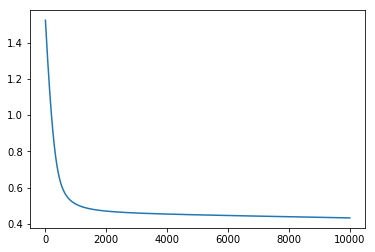

In [45]:
plt.plot(loss_list)
plt.show()

**Question: What is the accuracy you achieved on X_test?**

<Fill - in>

**What modifications did you do to receive this score?**